In [17]:
# Imports
import os
import cv2
import matplotlib.pyplot as plt
import random

In [47]:
# Define paths to the dataset directories
image_dir = 'train/images'
label_dir = 'train/labels'

# Choose a random image from the image directory
image_filenames = os.listdir(image_dir)
random_image_filename = random.choice(image_filenames)
label_filename = random_image_filename.replace('.jpg', '.txt').replace('.png', '.txt')

image_path = os.path.join(image_dir, random_image_filename)
label_path = os.path.join(label_dir, label_filename)

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load the label file
with open(label_path, 'r') as file:
    labels = file.readlines()

# Get image dimensions
height, width, _ = image.shape

In [48]:
# Parse the labels and draw bounding boxes
for label in labels:
    class_id, x_center, y_center, bbox_width, bbox_height = map(float, label.strip().split())
    
    # Convert normalized coordinates to pixel coordinates
    x_center = int(x_center * width)
    y_center = int(y_center * height)
    bbox_width = int(bbox_width * width)
    bbox_height = int(bbox_height * height)
    
    # Calculate the top-left corner of the bounding box
    x_min = int(x_center - bbox_width / 2)
    y_min = int(y_center - bbox_height / 2)
    
    # Calculate the bottom-right corner of the bounding box
    x_max = x_min + bbox_width
    y_max = y_min + bbox_height

    # Draw the bounding box on the image
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 255), 2)

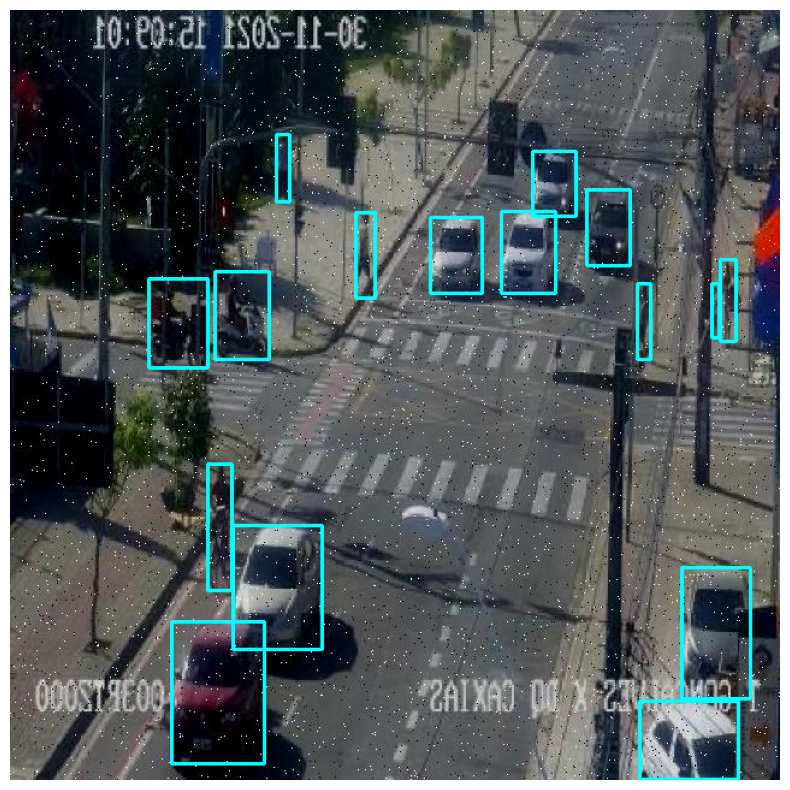

In [49]:
# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()